# LISTA 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as r


Zadanie $1$ <br>

Docent zaproponował studentowi grę, w której rzucają kostką. Jeśli wyapdnie $5$ lub $6$ oczek, to docent wygrywa połowę pieniędzy, które ma aktualnie w puli student. Jeśli wypadnie mniej niż na początku gry decyduje, ile pieniędzy przeznacza na start do swojej puli (o ile tyle ma), ale później nie może tam dokładać ani zabierać stamtąd pieniędzy. <br>
(a) naryusuj jedną relizację tej gry dla początkowej kwoty $100$ zł i $20$ rund, <br>
(b) powtórz symulację tej gry $1000$ razy i sprawdź, jakie jest "prawdopodobieństwo" tego, że student po $20$ rundach coś wygra, <br>
(c) zrób to nie używając pętli.


Zaczynamy z kwotą 100 zł. Jeśli docent trafi 5 lub 6 to wygrywa połowe stawki studenta. Jeśli student trafi pozostałe to wygrywa od docenta połowę stawki studenta

In [78]:
#a
Wyg=0

for R in range (0,1):
    x=np.random.randint(low=1,high=7, size=20)
    S=100
    D=0
    for N in range(0,np.size(x)):
        if(x[N]==5 or x[N]==6): #jeśli losowana liczba jest 5 lub 6 to student przegra
            S=S/2
            D=D+S/2
        else:
            S=3/2*S #student wygrywa bo wylosowano 1, 2, 3 lub 4
            D=D-S/2
    #print(S,D)
    if S>100:
        Wyg +=1 
print('Prawodpodobienstwo zarobienia pieniędzy przez studenta wynosi %g'%(Wyg/1))

Prawodpodobienstwo zarobienia pieniędzy przez studenta wynosi 1


In [73]:
#b
Wyg=0

for R in range (0,1000):
    x=np.random.randint(low=1,high=7, size=20)
    S=100
    D=0
    for N in range(0,np.size(x)):
        if(x[N]==5 or x[N]==6): #jeśli losowana liczba jest 5 lub 6 to student przegra
            D=D+S/2
            S=S/2
            
        else:
            D=D-S/2
            S=3/2*S #student wygrywa bo wylosowano 1, 2, 3 lub 4
            
    #print(S,D)
    if S>100:
        Wyg +=1 
print('Prawodpodobienstwo zarobienia pieniędzy przez studenta wynosi %g'%(Wyg/1000))

    


Prawodpodobienstwo zarobienia pieniędzy przez studenta wynosi 0.654


In [57]:
#c bez pętli
x=np.random.randint(low=1, high=7, size=20) 
print(x) #pokazujemy 20 wylosowanych liczb w 20 rzutach
#musimy przefiltrowac 5 i 6 na 1/2 a reszte na 3/2 dac studentowi 100 zl i to sumowac
y=np.zeros(20)
y[x<5]=1.5
y[x>4]=1.0/2
s = 100 #początkowa pula pieniędzy studenta

#def robi to samo, więc nie będę powielać...
#def filtrstudent(wynik):
  #  kostki = [1, 2, 3, 4]
   # return 1/2 if wynik in kostki else 3/2

#filtrowanystudent = filter(filtrstudent, x)
#wygrane = tuple(filtrowanystudent)
#print(wygrane, 'udało mu się', len(wygrane), 'razy')
#...koniec, ale niech zostanie

print(y) #opis wygrania i przegrania w danym rzucie
wynik = np.cumprod(y) * s
print(wynik)
ostatni = wynik[19]
print("ostatnia liczba z naszej macierzy to końcowa kwota studenta podczas gry: ", ostatni)

[3 5 4 2 1 5 6 1 1 3 2 6 6 5 6 5 3 2 5 5]
[1.5 0.5 1.5 1.5 1.5 0.5 0.5 1.5 1.5 1.5 1.5 0.5 0.5 0.5 0.5 0.5 1.5 1.5
 0.5 0.5]
[150.          75.         112.5        168.75       253.125
 126.5625      63.28125     94.921875   142.3828125  213.57421875
 320.36132812 160.18066406  80.09033203  40.04516602  20.02258301
  10.0112915   15.01693726  22.52540588  11.26270294   5.63135147]
ostatnia liczba z naszej macierzy to końcowa kwota studenta podczas gry:  5.631351470947266


Zadanie $2$ <br>

Wygeneruj sto wyników rzutu symetryczną monetą. Sprawdź, czy wypadło $5$ orłów z rzędu. Powrtórz eksperymet $1000$ razy i oblicz "prawdopodobieństwo" zdarzenia "wypadło $5$ orłów z rzędu".

In [173]:
import numpy as np
t= []
zlicz=0
for R in range (0,1000): 
    W1=W2=0 #w1 orzeł w2 reszka
    L=0 #zbieram orły
    I=0 #kwinta 
    #sto rzutów w zdarzeniu
    P=np.random.randint(2,size=100)
    #print(P)
    for N in range(0,100):
        if(P[N]>0.5):
            W1+=1
            L+=1
        else:
            W2+=1
            L=0
        if(L==5):
            I+=1
            L=0
    if I>0:
        zlicz +=1
        t.append(zlicz>0)
#print(t)
sumt=sum(t)
print(sumt)
        
#print('Mieliśmy do czynienia ',I,' z przypadkiem pięciokrotnego wylosowania orła.')
#print('Wylosowano ',W1,' razy orła oraz ',W2,' razy reszkę')

#Przykładowe wyznaczenie prawodpodobieństwa wylosowanie n razy orła.
#n=5
#P=0.5**n
#print('Prawdopodobieństwo wylosowania ',n,' razy orła wynosi dokładnie ',P*100,'%')
print('Prawdopodobieństwo wylosowania kwinty (lub kilku kwint) w jednej grze to ',(zlicz/1000))

790
Prawdopodobieństwo wylosowania kwinty (lub kilku kwint) w jednej grze to  0.79


In [18]:
sumkw=[]
N=100 #rzuty
def rzuty(n):
    orzeł=0
    reszka=0
    Licznik=0
    kwinta=0
    for N in range(0,n):
        if P[N]==1:
            orzeł += 1
            Licznik += 1
        else:
            reszka += 1
            Licznik=0
        if Licznik==5:
            kwinta += 1
    
   #print(" Mieliśmy do czynienia %g razy z kwintą, wypadło %g orłów oraz %g reszek" % (kwinta, orzeł, reszka))
    return sumkw.append(kwinta)        


K=1000;
#rzuty(100)
for N in range(0,K):
    P=np.random.randint(2,size=100)
    rzuty(100)
    #sumkw.append(kwinta)
#print(sumkw)
X=sum(sumkw)
print(X/10**5)

0.01476


Zadanie $3$ <br>

Wygeneruj realizację jednowymiarowego błądznia losowego, w którym punkt porusza się w praow z zadanym prawdopodobieństwm $p$ i w lewo z prawdopodobieństwa $1-p$ (ma być $t$ kroków błądzenia losowego). <br>
(a) narysuj jedną realizację dla $t = 200$ (na osi $X$ czas, na $Y$ położenie punktu), <br>
(b) powtórz $100$ razy błądzenia losowe dla $t = 200$ i oblicz "prawdopodobieństwo" zdarzenia, że trajektoria kiedykolwiek odwiedzi jeszcze raz punkt startowy, <br>
(c) zrób to nie używając pętli.

In [ ]:
#c bez pętli
x=np.random.randint(low=1, high=7, size=20) 
print(x) #pokazujemy 20 wylosowanych liczb w 20 rzutach
#musimy przefiltrowac 5 i 6 na 1/2 a reszte na 3/2 dac studentowi 100 zl i to sumowac
y=np.zeros(20)
y[x<5]=1.5
y[x>4]=1.0/2
s = 100 #początkowa pula pieniędzy studenta
def filtrstudent(wynik):
    kostki = [1, 2, 3, 4]
    return 1/2 if wynik in kostki else 3/2

filtrowanystudent = filter(filtrstudent, x)
wygrane = tuple(filtrowanystudent)
#print(wygrane, 'udało mu się', len(wygrane), 'razy')
print(y) #opis wygrania i przegrania w danym rzucie
wynik = np.cumsum(y) * s
print(wynik)
ostatni = wynik[19]
print("ostatnia liczba z naszej macierzy to końcowa kwota studenta podczas gry: ", ostatni)

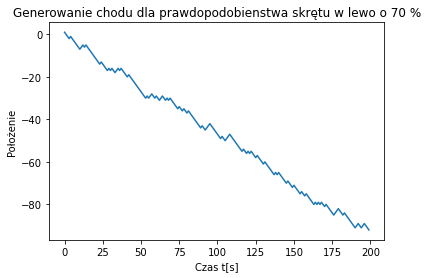

In [28]:
#a
PL= 0.7 #wybieram prawdopodobieństwo skrętu w lewo w prawo będzie PR=1-PL
P=np.random.rand(200)
Poz=np.zeros(200)
for N in range(0,1):
    P=np.random.rand(200)
    PozX=0 #pozycja początkowa
    for t in range(0,200):
        if(P[t]<PL):
            PozX-=1 #tu idzie w lewo
        else:
            PozX+=1 #tu idzie w prawo
        Poz[t]=PozX
    t=np.arange(0,200,1)
    plt.plot(t, Poz)
    plt.title('Generowanie chodu dla prawdopodobienstwa skrętu w lewo o %d %%' %(PL*100))
    plt.ylabel('Położenie')
    plt.xlabel('Czas t[s]')

[True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False]
Prawdopodobienstwo powrotu do punktu początkowego wynosi 0.89


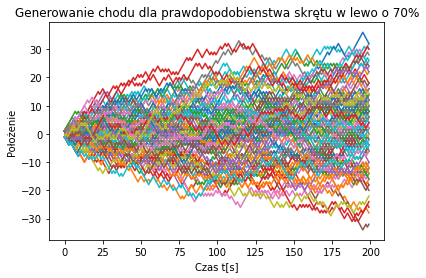

In [87]:
#b
wraca=[]
PL= 0.5
P=np.random.rand(200)
Poz=np.zeros(200)

for N in range(0,100):
    L = 0
    P=np.random.rand(200)
    PozX=0 #pozycja początkowa
    for t in range(0,200):
        if(P[t]<PL):
            PozX-=1 #tu idzie w lewo
        else:
            PozX+=1 #tu idzie w prawo
        Poz[t]=PozX
        if PozX==0:
            L += 1
    t=np.arange(0,200,1)
    plt.plot(t, Poz)
    plt.title('Generowanie chodu dla prawdopodobienstwa skrętu w lewo o 70%')
    plt.ylabel('Położenie')
    plt.xlabel('Czas t[s]')
    wraca.append(L>0)
print(wraca)
sumawraca=sum(wraca)
print('Prawdopodobienstwo powrotu do punktu początkowego wynosi %.2g' %(sumawraca/(100)))

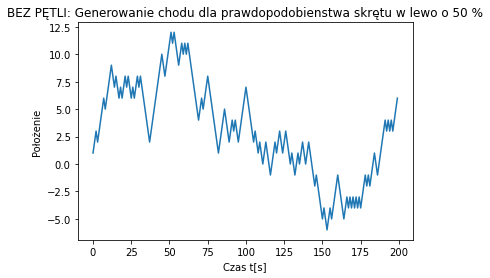

In [50]:
#c bez pętli
x = np.random.rand(200)
y = np.zeros(200)
PozX = 1 #pozycja początkowa błądzenia
PL = 0.5 #prawdopodobieństwo skrętu w lewo
y[x<PL] = -1 #wektor błądzi w lewo
y[x>PL] = 1 #wektor błądzi w prawo

#ta definicja nie jest potrzebna bo robi tożsame rzeczy ...
#def filtrwektora(wynik):
   # return -1 if wynik < PL else 1

#filtrowanywektor = filter(filtrwektora, x)
#zwrot = tuple(filtrowanywektor)
#print(zwrot)
#...koniec niepotrzebnej części, ale niech zostanie


#print(y) #macierz pokazująca, w którą stornę będzie błądził wektor w danym ruchu
wektor = np.cumsum(y)
#print(wektor)
t = np.arange(0,200,1)
plt.plot(t, wektor)
plt.title('BEZ PĘTLI: Generowanie chodu dla prawdopodobienstwa skrętu w lewo o %d %%' %(PL*100))
plt.ylabel('Położenie')
plt.xlabel('Czas t[s]')
plt.show()

Zadanie $4$ <br>
Wygeneruj wektor błądzenia losowego na płaszyźnie, w którym punkt porusza się z równym (0.25) prawdopodobieństwami w lewo, prawo, w przód i w tył dla $t$ kroków błądzenia losowego. <br>
a) narysuj jedną realizację błądzenia dla $t = 200$ (nie ma osi czasu, na wykresie jest tylko położenie), <br>
b) powtórz $100$ razy błądzenie losowe dla $t = 200$ i oblicz "prawdopodobieństwo" zdarzenia, że trajektoria kiedykolwiek odwiedzi jeszcze raz punkt startowy, <br>
c) zrób to nie używając pętli.


Wektor błądzenia losowego po osi Y w czasie $ t \in (0:200 )$

Text(0, 0.5, 'Współrzędne Y')

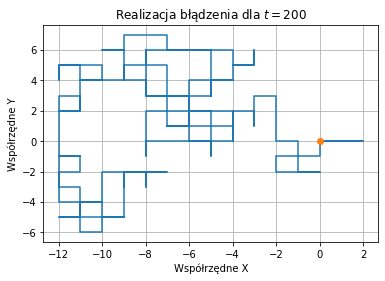

In [35]:
#a
PozX=0;
PozY=0;
X=np.zeros(200)
Y=np.zeros(200)
Y[0]=PozY;
X[0]=PozX
for t in range(0,200):
    P=r.random()
    if (P<.25):
        PozX -= 1; #w lewo
    elif (.25<=P<.5):
        PozX=PozX+1;# w prawo
    elif (.5<=P<.75):
        PozY=PozY+1;# w górę
    elif (.75<=P<1):
        PozY=PozY-1;#w dół
    X[t]=PozX
    Y[t]=PozY
plt.plot(X,Y)
plt.plot(0,0,'o') 
plt.grid(True)
plt.title('Realizacja błądzenia dla $t=200$')
plt.xlabel('Współrzędne X')
plt.ylabel('Współrzędne Y')


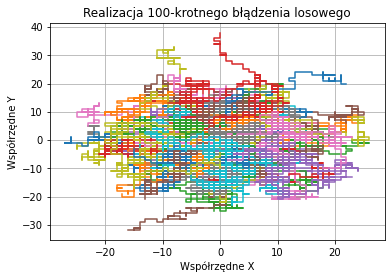

[True, True, True, False, False, True, True, True, False, True, True, True, True, True, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, False, True, True, False, False, False, True, True, False, True, False, True, False, True, False, True, True, True, True, True, False, False, True, True, True, True, True, False, True, False, True, False, True, True, True, False, True, True, True, True, False, False, True, False, False, False, False, False, True, True, True, False, False, True, True, True, True, False, False, True, True, True, True, True, True, False, True, False, True, False, True, False, True, True, False, True, True, True, True, False, False, True, True, False, True, True, False, True, True, False, False, False, False, True, False, False, True, False, False, False, True, True, True, True, False

In [95]:
#b
wraca = []
PozX=0; #pozycja początkowa dla x
LL=0 #zliczanie powrotu do punktu 0
PozY=0; #pozycja początkowa dla y
X=np.zeros(200)
Y=np.zeros(200)
Y[0]=PozY;
X[0]=PozX
plt.title('Realizacja 100-krotnego błądzenia losowego')
plt.xlabel('Współrzędne X')
plt.ylabel('Współrzędne Y')
for L in range(0,200):
    PozX=0;
    PozY=0;
    X=np.zeros(200)
    Y=np.zeros(200)
    Y[0]=PozY;
    X[0]=PozX
    LL=0
    #Deklarowanie pocz. parametrów
    for t in range(0,200):
        P=r.random()
        if (P<.25):
            PozX=PozX-1; #w lewo
        elif (.25<=P<.5):
            PozX=PozX+1; #w prawo
        elif (.5<=P<.75): 
            PozY=PozY+1; #w górę
        elif (.75<=P<1):
            PozY=PozY-1; #w dół
        X[t]=PozX
        Y[t]=PozY
        if PozX==0 and PozY==0: #powrót do pozycji początkowej
            LL += 1 #doliczamy powroty
    plt.plot(X,Y)
    wraca.append(LL>0) #zbieramy powroty do pozycji początkowej w macierz
plt.grid(True)
plt.show(True)

#obliczam prawdopodobieństwo zdarzenia
print(wraca)
sumawraca=sum(wraca)
print('Prawdopodobienstwo powrotu do punktu początkowego wynosi %.2g' %(sumawraca/(200)))

Text(0, 0.5, 'Współrzędne Y')

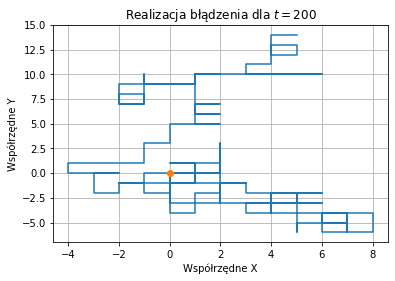

In [51]:
#c bez pętli
x=np.random.randint(low=1, high=5, size=200) 
#print(x) #pokazujemy 200 wylosowanych liczb z przedziału xe[1,4]
y=np.zeros(200)
X=np.zeros(200)
Y=np.zeros(200)
X[x==1]=1 
X[x==2]=-1 
Y[x==3]=1 
Y[x==4]=-1 
PozX=1;
PozY=1;


Y[0]=PozY;
X[0]=PozX;

wektorX=np.cumsum(X)
wektorY=np.cumsum(Y)

wektor = np.cumsum(y) * t

t = np.arange(0,200,1)
X[t]=PozX
Y[t]=PozY
plt.plot(wektorX,wektorY)
plt.plot(0,0,'o') 
plt.grid(True)
plt.title('Realizacja błądzenia dla $t=200$')
plt.xlabel('Współrzędne X')
plt.ylabel('Współrzędne Y')

In [ ]:
#Poz=[e+0.1, e=e+0.1 for i in range (len(P)) if P[i]==0 else e-0.1,e=e-0.1]
